## Introduction

We would like to modify an audio signal with various effects. We have decided on a guitar solo and would like to process it with the following effects: Delay, distortion, chorus and reverb.

## Import all necessary libraries

In [662]:
import numpy as np
from scipy.signal import lfilter, firwin
from scipy.signal import convolve
from utils import plot_time_domain, plot_frequency_spectrum
import sounddevice as sd
import soundfile as sf
from effects import AudioEffects
from pedalboard import Pedalboard, Reverb, Chorus, Delay, Distortion


In [663]:
from importlib import reload
import utils
reload(utils)


<module 'utils' from 'c:\\Users\\stani\\OneDrive - ZHAW\\Dokumente\\GitHub\\ISP_Project\\utils.py'>

In [664]:
from importlib import reload
import effects 
reload(effects)


<module 'effects' from 'c:\\Users\\stani\\OneDrive - ZHAW\\Dokumente\\GitHub\\ISP_Project\\effects.py'>

## Read the audio file

In [665]:
print(utils.__file__)

c:\Users\stani\OneDrive - ZHAW\Dokumente\GitHub\ISP_Project\utils.py


In [666]:
sd.query_devices()
sd.query_devices(1)

{'name': 'Lautsprecher (High Definition A',
 'index': 1,
 'hostapi': 0,
 'max_input_channels': 0,
 'max_output_channels': 2,
 'default_low_input_latency': 0.09,
 'default_low_output_latency': 0.09,
 'default_high_input_latency': 0.18,
 'default_high_output_latency': 0.18,
 'default_samplerate': 44100.0}

In [667]:
effects = AudioEffects("guitar_sample.wav")
Audio, samplerate = sf.read("guitar_sample.wav")


## Delay

**What is delay?**

Delay is an audio effect that creates one or more repetitions of a sound or signal. These repetitions occur with a fixed delay after the original sound. Delay can be used to create rhythmic patterns, increase the depth of sound or create special sound effects in a recording.

**How does delay work?**

Delay records the original audio signal and plays it back after a fixed time delay. This delay is often measured in milliseconds. Most delay devices or software allow you to set the duration of the delay, the volume of the repetitions and the number of repetitions (feedback).

**Example of a guitar solo:**

When delay is applied to a guitar solo, you will hear the original signal followed by several repetitions, which may decay faster or slower depending on the setting. For example, a guitar riff might be played, and then the same riff might be heard a little fainter, and then fainter again, as if it were slowly drifting off into the distance. This can give the solo a fascinating rhythmic and melodic quality that enriches the musical experience.

In [742]:
# Apply delay
delayed_audio = effects.apply_delay(0.5,feedback=1) #0.5sec delay
print(effects.original_data.shape, type(effects.original_data))
print(delayed_audio.shape, type(delayed_audio))
print(effects.samplerate, type(effects.samplerate))
print(effects.original_data)
print(effects.samplerate)

# Delay with pedalboard
delay = Delay(delay_seconds=0.5, mix=0.3)  
board_delay = Pedalboard([delay])
delayed_audio_package = board_delay(Audio, sample_rate=samplerate)

(380416, 2) <class 'numpy.ndarray'>
(380416, 2) <class 'numpy.ndarray'>
44100 <class 'int'>
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 ...
 [ 8.74757767e-04  9.48667526e-04]
 [ 3.57627869e-05  3.68595123e-04]
 [-9.66072083e-04  1.43766403e-04]]
44100


### Original Audio

Original Audio


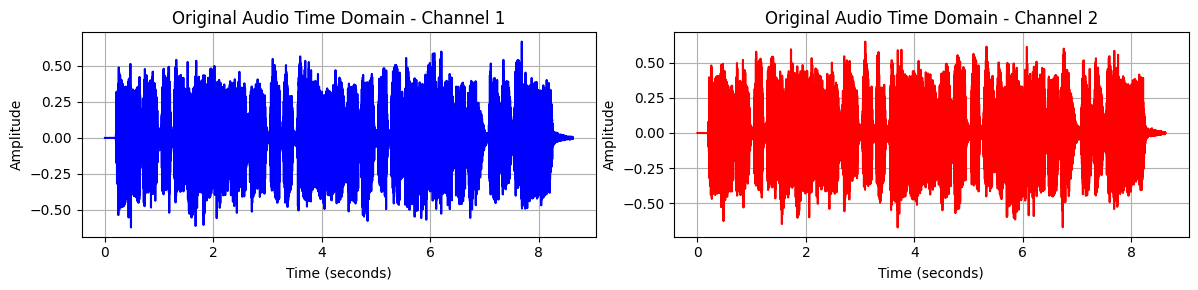

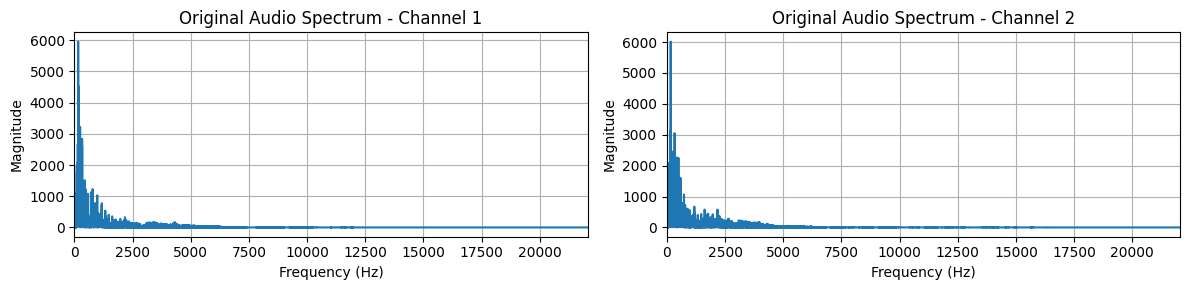

In [695]:
print("Original Audio")
plot_time_domain(effects.original_data, effects.samplerate, "Original Audio Time Domain")
plot_frequency_spectrum(effects.original_data, effects.samplerate, "Original Audio Spectrum")
effects.play_audio(effects.original_data)

### Delayed Audio with own functions

Delayed Audio


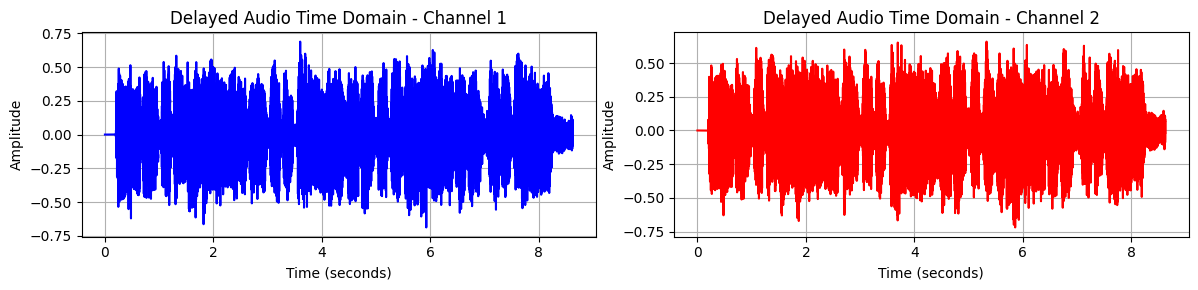

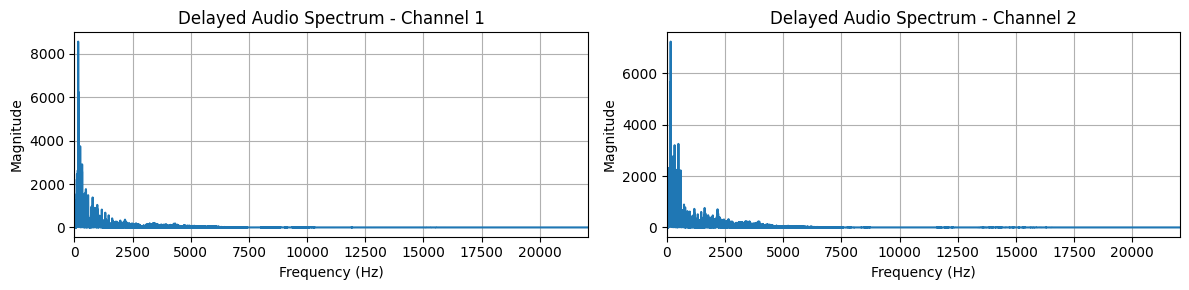

In [700]:
print("Delayed Audio")
plot_time_domain(delayed_audio, effects.samplerate, "Delayed Audio Time Domain")
plot_frequency_spectrum(delayed_audio, effects.samplerate, "Delayed Audio Spectrum")
effects.play_audio(delayed_audio)

### Delayed Audio with pedalboard library

Delayed Audio (package)


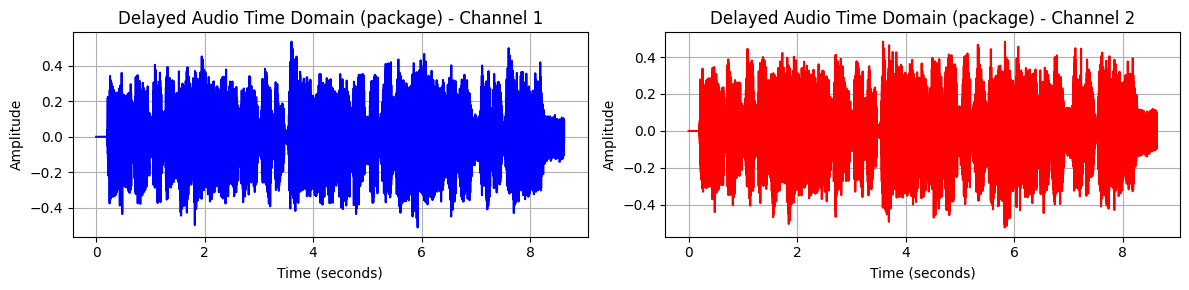

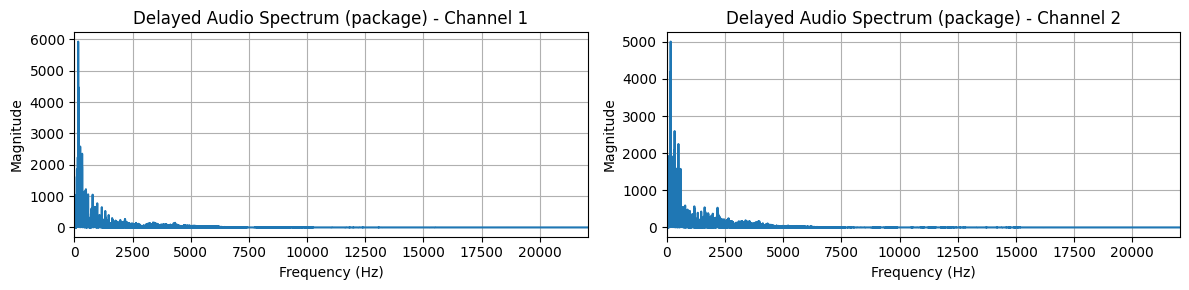

In [702]:
print("Delayed Audio (package)")
plot_time_domain(delayed_audio_package, effects.samplerate, "Delayed Audio Time Domain (package)")
plot_frequency_spectrum(delayed_audio_package, effects.samplerate, "Delayed Audio Spectrum (package)") 
sd.play(delayed_audio_package)     

## Distortion

**What is distortion?**

Distortion is an effect often used in music production to give a signal a 'rougher' or 'denser' sound. This effect is often used in rock and metal music to give guitars an aggressive sound.

**How does distortion work?**

Distortion works by deliberately 'clipping' or cutting off the amplitudes of sound waves above a certain threshold. This results in a distortion of the original waveform, adding harmonics that make the signal sound harder and louder.

**Example of a guitar solo:**

Imagine that a guitar solo is played without distortion and sounds relatively clean and smooth. When distortion is applied, the solo becomes louder, more aggressive and has a more textured sound quality, which is often desirable in rock music.

In [703]:
distorted_audio = effects.apply_distortion(threshold=0.5)
soft_clipped_audio = effects.apply_soft_clipping(gain=10, threshold=0.8)
sigmoid_distorted_audio = effects.apply_sigmoid_distortion(gain=20)

# Distortion with pedalboard
distortion = Distortion(drive_db=20)
board_distortion = Pedalboard([distortion])
distorted_audio_package = board_distortion(Audio, sample_rate=samplerate)

### Original Audio

Original Audio


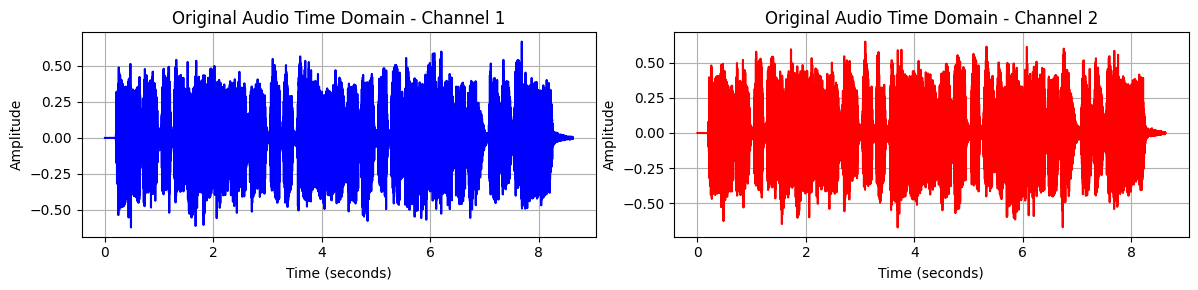

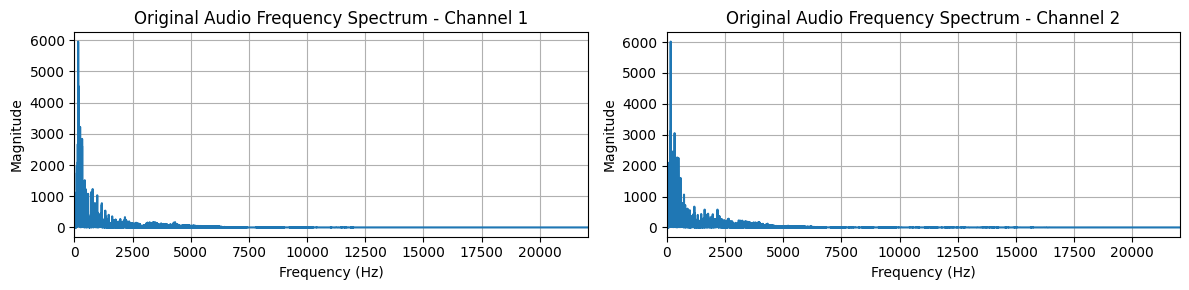

In [707]:
print("Original Audio")
plot_time_domain(effects.original_data, effects.samplerate, "Original Audio Time Domain")
plot_frequency_spectrum(effects.original_data, effects.samplerate, "Original Audio Frequency Spectrum")
effects.play_audio(effects.original_data)

### Distorted Audio with own Functions (normal Distortion)

Distorted Audio


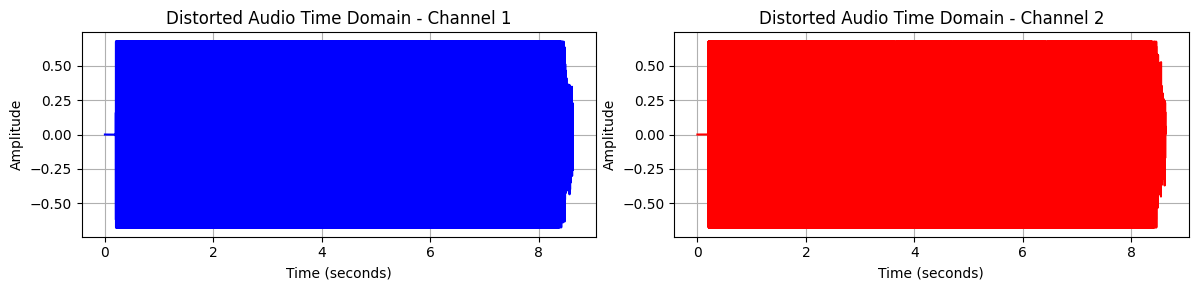

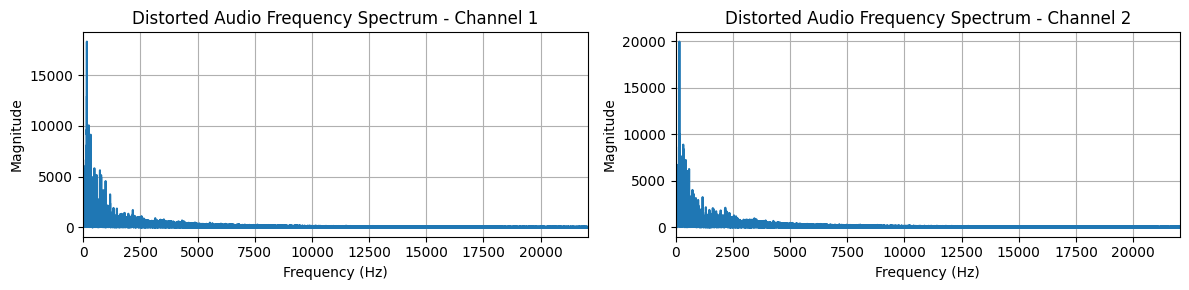

In [708]:
#NOCH NICHT GANZ KORREKT
print("Distorted Audio")
plot_time_domain(distorted_audio, effects.samplerate, "Distorted Audio Time Domain")
plot_frequency_spectrum(distorted_audio, effects.samplerate, "Distorted Audio Frequency Spectrum")
effects.play_audio(distorted_audio)

### Distorted Audio with own Functions (Soft Clipped Distortion)

Soft Clipped Audio


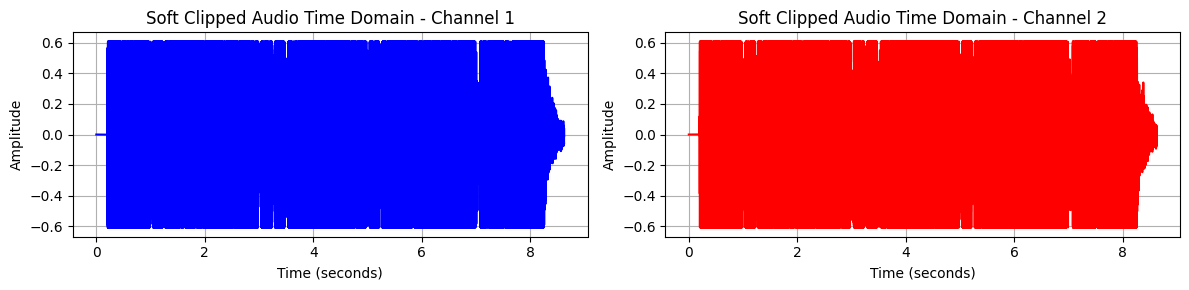

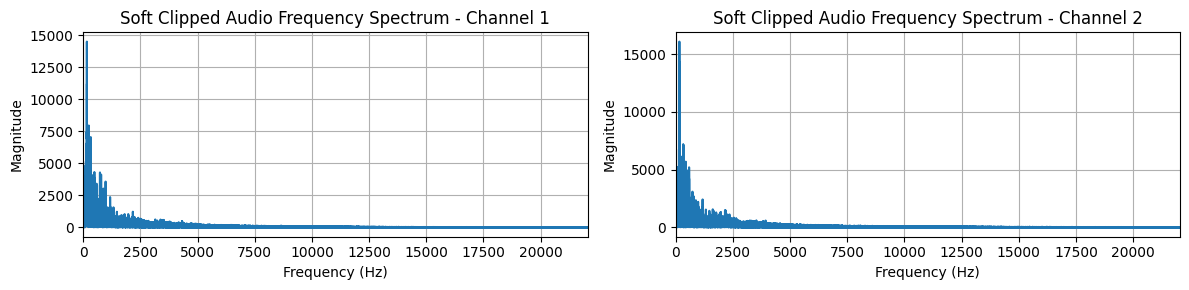

In [709]:
print("Soft Clipped Audio")
plot_time_domain(soft_clipped_audio, effects.samplerate, "Soft Clipped Audio Time Domain")
plot_frequency_spectrum(soft_clipped_audio, effects.samplerate, "Soft Clipped Audio Frequency Spectrum")
effects.play_audio(soft_clipped_audio)

### Distorted Audio with own Functions (Sigmoid Distortion)

Sigmoid Distorted Audio


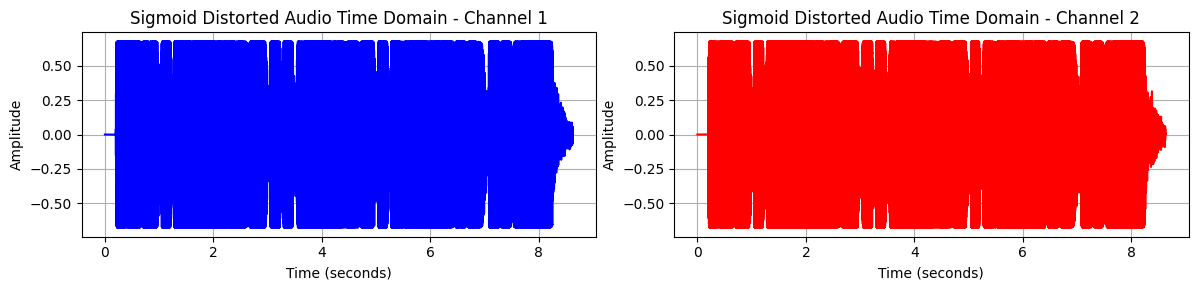

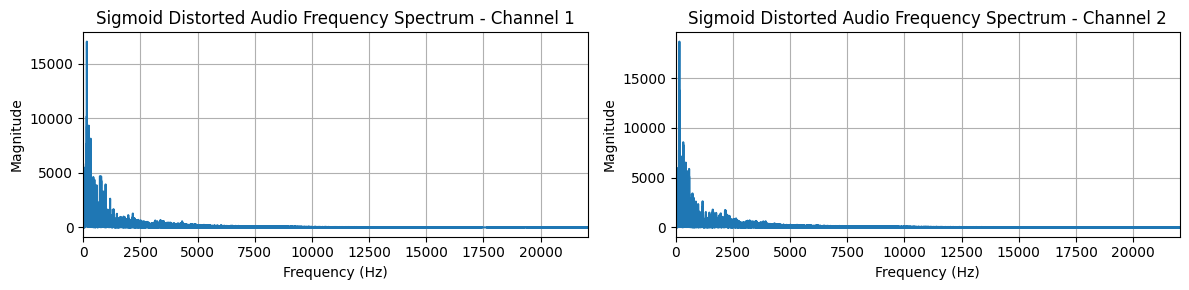

In [710]:
print("Sigmoid Distorted Audio")
plot_time_domain(sigmoid_distorted_audio, effects.samplerate, "Sigmoid Distorted Audio Time Domain")
plot_frequency_spectrum(sigmoid_distorted_audio, effects.samplerate, "Sigmoid Distorted Audio Frequency Spectrum")
effects.play_audio(sigmoid_distorted_audio)

### Distorted Audio with pedalboard library (only normal Distortion available)

Distorted Audio (package)


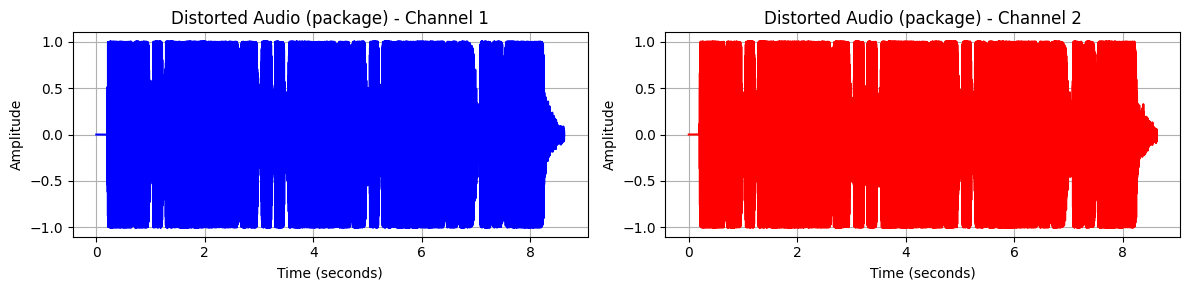

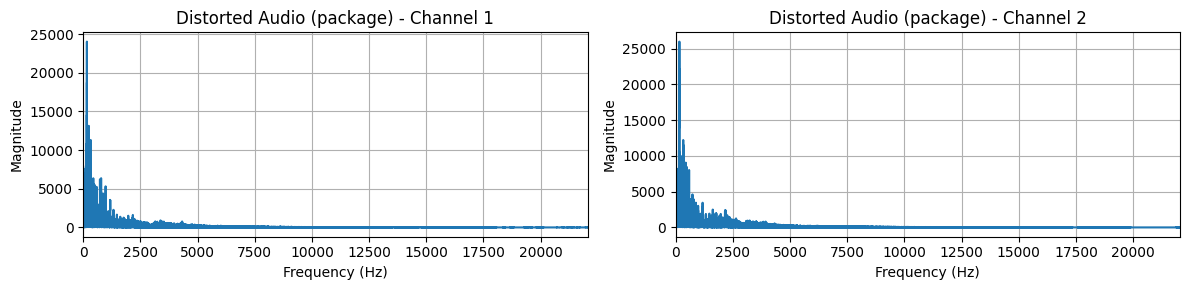

In [711]:
print("Distorted Audio (package)")
plot_time_domain(distorted_audio_package, effects.samplerate, "Distorted Audio (package)")
plot_frequency_spectrum(distorted_audio_package, effects.samplerate, "Distorted Audio (package)")
sd.play(distorted_audio_package)

## Chorus

**What is Chorus?**

Chorus is a modulation effect used to add richness and depth to the sound of an instrument or voice. It can help make a single voice or instrument sound as if several are playing at the same time.

**How does Chorus work?**

Chorus duplicates the original signal and adds small delays and modulations to the delay time. These changes are usually very subtle and cause the duplicated signals to sound slightly 'out of place', creating a richer, 'chorus-like' texture.

**Example of a guitar solo:**

When Chorus is applied to a guitar solo, it sounds as if several guitars are playing at the same time, each with a slightly different timing and pitch modulation, giving the solo a floating and dreamlike quality.

In [712]:
chorus_audio = effects.apply_chorus(depth_ms=20, decay=0.4)

# Chorus with pedalboard
chorus = Chorus(rate_hz=1.5, depth=0.5, centre_delay_ms=7.0, feedback=0.25, mix=0.5)
board_chorus = Pedalboard([chorus])
chorused_audio_package = board_chorus(Audio, sample_rate=samplerate)

### Original Audio

Original Audio


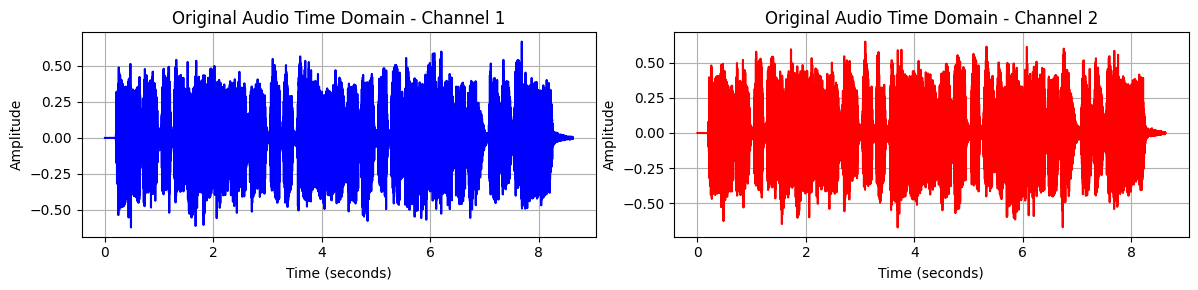

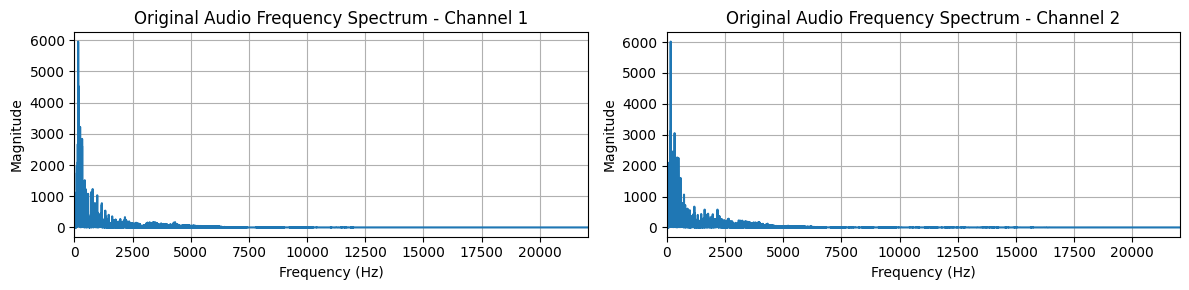

In [713]:
print("Original Audio")
plot_time_domain(effects.original_data, effects.samplerate, "Original Audio Time Domain")
plot_frequency_spectrum(effects.original_data, effects.samplerate, "Original Audio Frequency Spectrum")
effects.play_audio(effects.original_data)

### Chrous Audio with own Functions

Chorus Audio


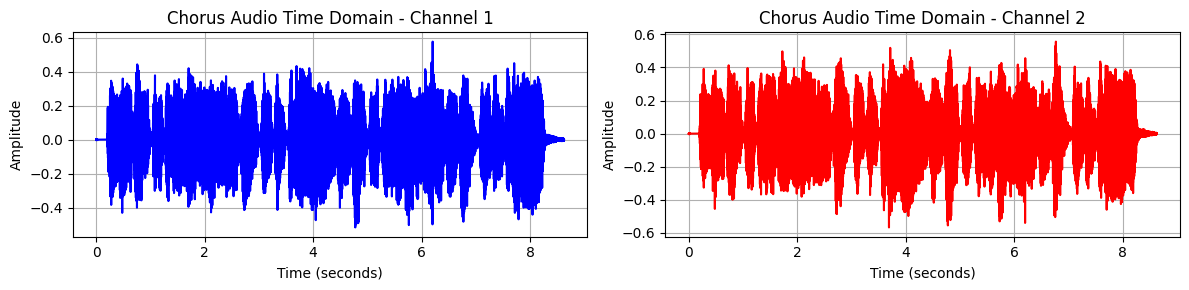

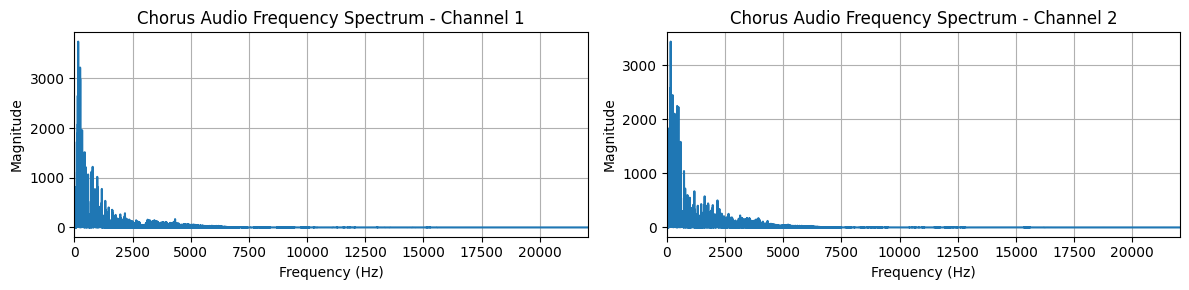

In [716]:
print("Chorus Audio")
plot_time_domain(chorus_audio, effects.samplerate, "Chorus Audio Time Domain")
plot_frequency_spectrum(chorus_audio, effects.samplerate, "Chorus Audio Frequency Spectrum")
effects.play_audio(chorus_audio)

### Chrous Audio with pedalboard library

Chorus Audio (package)


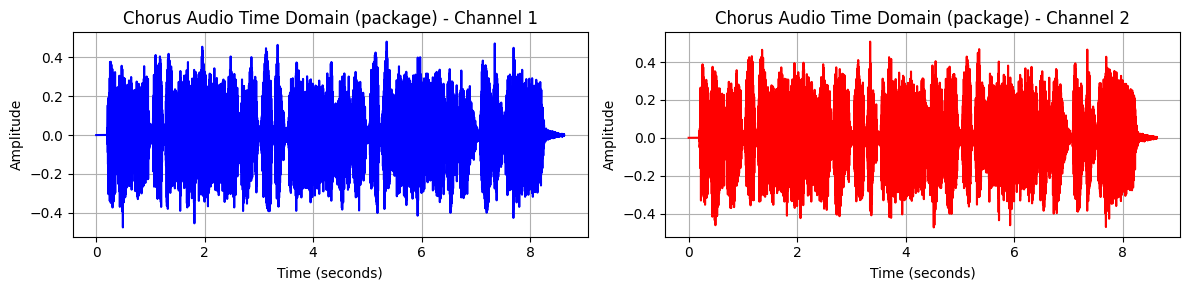

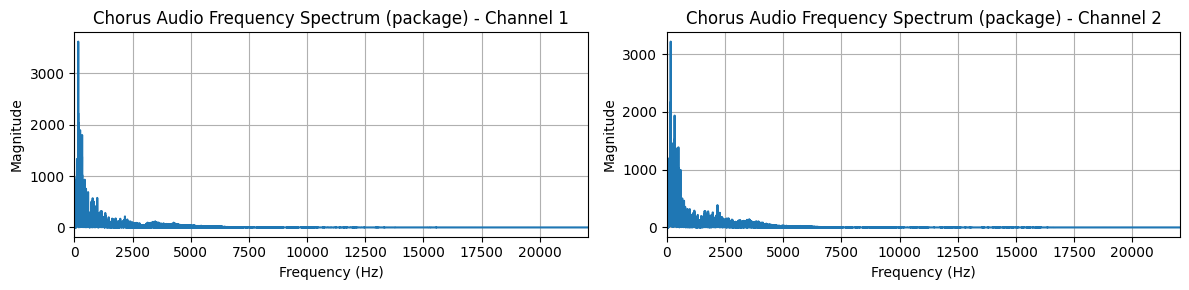

In [715]:
# Plotten der Original- und modifizierten Audiodaten in der Zeitdomäne
print("Chorus Audio (package)")
plot_time_domain(chorused_audio_package, effects.samplerate, "Chorus Audio Time Domain (package)")
plot_frequency_spectrum(chorused_audio_package, effects.samplerate, "Chorus Audio Frequency Spectrum (package)")
sd.play(chorused_audio_package, samplerate)

## Reverb

**What is reverb?**

Reverb, or reverb, simulates the natural echoes that occur in a physical environment after a sound has been played. This effect is used to add depth and spaciousness to a recording.

**How does reverb work?**

Reverb is created by mixing the original signal with a series of echoes that fade over time. The parameters of reverb, such as room size and decay time, affect the characteristics of these echoes.

**Example of a guitar solo:**

When reverb is applied to a guitar solo, it sounds as if it is being played in a larger room or even a hall. The effect adds a spatial dimension to the solo, giving the impression that the music is being played in a larger and more resonant environment.

In [740]:
reverbed_audio = effects.apply_reverb(room_size=0.5, decay_factor=5, wet_level=0.1, dry_level=0.1, width=1.0, freeze_mode=0.0) 

# Reverb with pedalboard
reverb = Reverb(room_size=0.5, damping=0.5, wet_level=0.33, dry_level=0.4, width=1.0, freeze_mode=0.0)
board_reverb = Pedalboard([reverb])
reverbed_audio_package = board_reverb(Audio, sample_rate=samplerate)


**Freeze Mode:** Sets all impulse response values to a constant value, creating a 'frozen' reverb effect.

**Damping:** Implemented by multiplying the impulse response with an exponential decay.

**Width:** Controls the spatial distribution of the reverb in the stereo image. This is implemented here as a simple pan control, where the width controls the balance between the channels.

**Dry/Wet Mix:** Controls the mixing ratio between the original (dry) and reverb (wet) signals.

**Normalisation:** Ensures that the final audio signal is not clipped.

### Original Audio

Original Audio


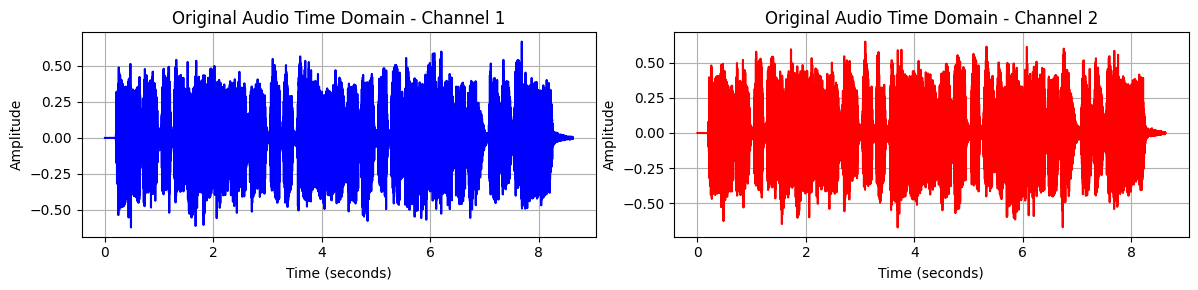

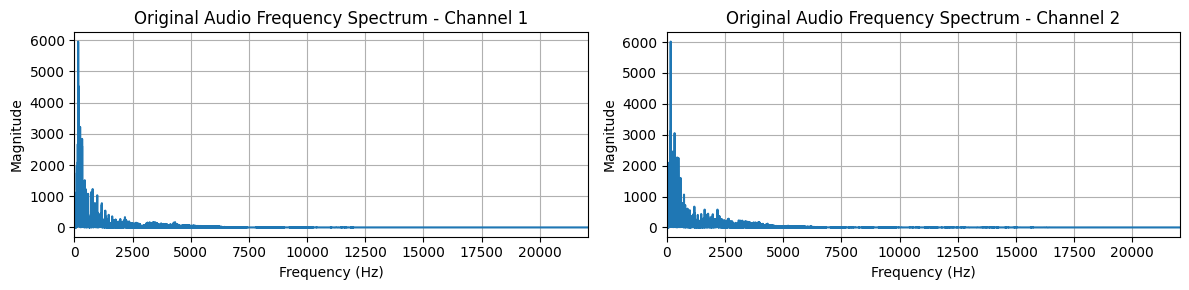

In [724]:
print("Original Audio")
plot_time_domain(effects.original_data, effects.samplerate, "Original Audio Time Domain")
plot_frequency_spectrum(effects.original_data, effects.samplerate, "Original Audio Frequency Spectrum")
effects.play_audio(effects.original_data)

### Reverb Effect with own Functions

Reverbed Audio


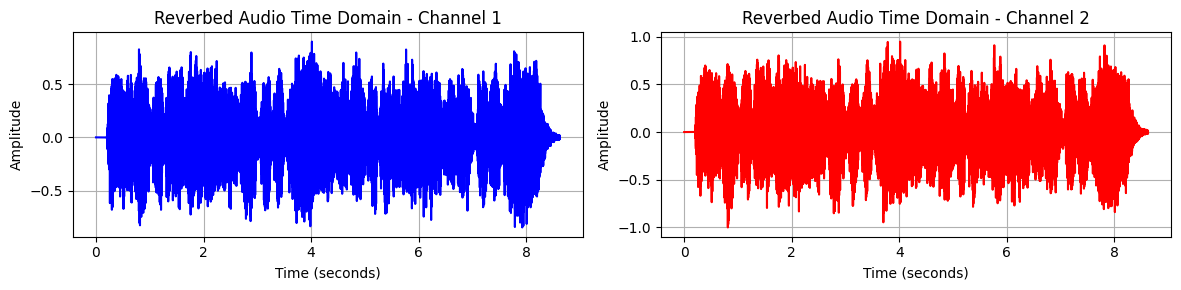

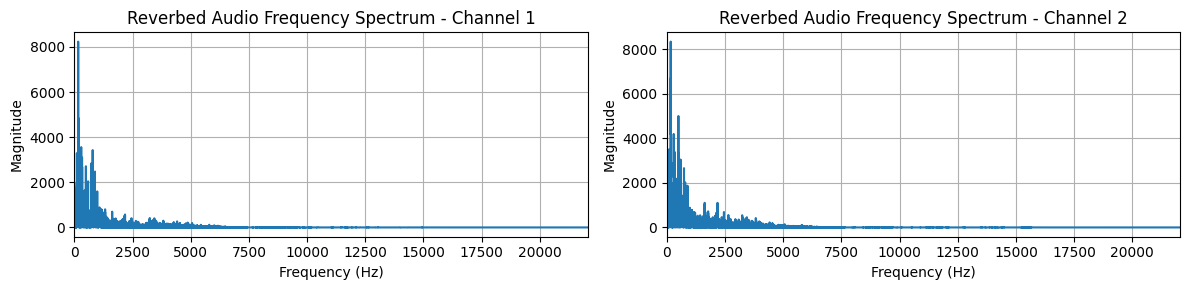

In [741]:
print("Reverbed Audio")
plot_time_domain(reverbed_audio, effects.samplerate, "Reverbed Audio Time Domain")
plot_frequency_spectrum(reverbed_audio, effects.samplerate, "Reverbed Audio Frequency Spectrum")
effects.play_audio(reverbed_audio)

### Reverb Effect with pedalboard library

Reverbed Audio (package)


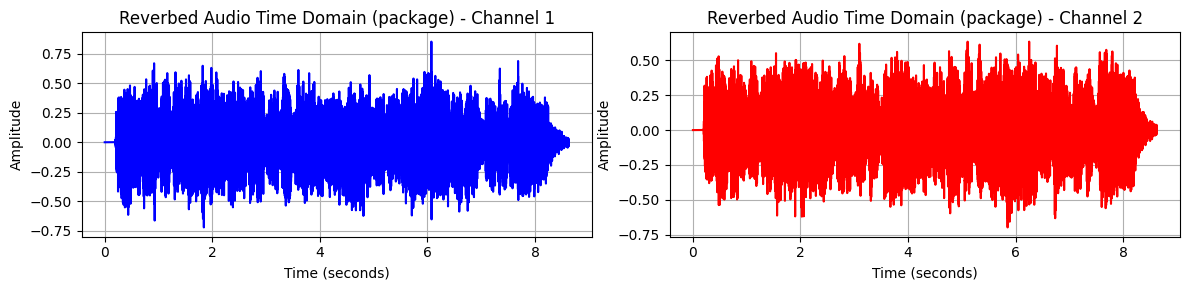

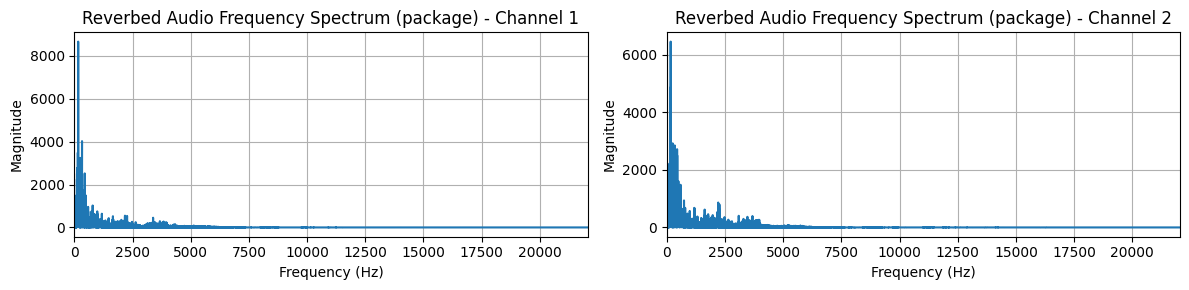

In [739]:
print("Reverbed Audio (package)")
plot_time_domain(reverbed_audio_package, effects.samplerate, "Reverbed Audio Time Domain (package)")
plot_frequency_spectrum(reverbed_audio_package, effects.samplerate, "Reverbed Audio Frequency Spectrum (package)")
sd.play(reverbed_audio_package, samplerate)